# Hyperfine beat and (electronic) alignment modelling

From prior work and data:

- Forbes, R. et al. (2018) ‘Quantum-beat photoelectron-imaging spectroscopy of Xe in the VUV’, Physical Review A, 97(6), p. 063417. Available at: https://doi.org/10.1103/PhysRevA.97.063417. arXiv: http://arxiv.org/abs/1803.01081, Authorea (original HTML version): https://doi.org/10.22541/au.156045380.07795038
- Data (OSF): https://osf.io/ds8mk/
- [Quantum Metrology with Photoelectrons (Github repo)](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons), particularly the [Alignment 3 notebook](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/blob/master/Alignment/Alignment-3.ipynb). Functions from this notebook have been incorporated in the current project, under `qbanalysis.hyperfine`.

## Formalism

In many physical processes, multiple eigenstates of the system are populated. This may be the result of thermal effects, in which case the states are incoherent, or via a coherent preparation process. In the latter case, the overall state of the system can be considered as a wavepacket, and will evolve in time. Assuming that the wavepacket is created “instantaneously” (with respect to the timescale of system/wavepacket evolution), such as via photon-absorption from a short laser pulse, then the ensuing dynamics is simply dependent on the phase-evolution of the eigenstates which form the superposition state.

A textbook example is the preparation of a superposition of hyperfine states in rare gas atoms via photo-absorption. Typically, a small number of hyperfine states are prepared, and their evolution results in relatively simple wavepacket behaviour, exhibiting clear quantum beats, correlated with a changing alignment of the charge distribution. A full treatment can be found in Sect. 4.7 of Blum's book [1].

For the case of quantum beats from a manifold of (hyperfine) states,
the state multipoles can be expressed as a product of an initial
state, and time-dependent coefficients, as per Eqns. 4.131 and 4.134
in Blum [1]:

\begin{equation}
\langle T(J;t)_{KQ}^{\dagger} \rangle =G(J;t)_{K}\langle T(J)_{KQ}^{\dagger}\rangle
\end{equation}

where

\begin{equation}
G(J;t)_{K}=\frac{1}{2I+1}\sum_{F',F}(2F'+1)(2F+1)\left\{ \begin{array}{ccc}
J & F' & I\\
F & J & K
\end{array}\right\} ^{2}\cos\left[\frac{(E_{F'}-E_{F})t}{\hbar}\right]
\end{equation}

and $\{...\}$ is a $6j$ symbol, $J$ is the electronic angular momentum,
$I$ the nuclear spin and $F,\,F'$ are hyperfine states that comprise the superposition (wavepacket).

Hence, $\langle T(J)_{KQ}^{\dagger}\rangle$ defines the initial state
of the system after preparation (defined by the state multipoles), and the time-evolution of the superposition
is given by $G(J;t)_{K}$. This contains the angular momentum coupling
between the hyperfine states (defined by the $6j$ symbol), and the
relative phase evolution of the states, expressed in terms of their
energy differences.

***
**References**

[1] Blum, K. (2012). Density Matrix Theory and Applications (3rd Editio, Vol. 64). Berlin, Heidelberg: Springer Berlin Heidelberg. https://doi.org/10.1007/978-3-642-20561-3

[2] Zare, R. N. (1988). Angular Momentum: Understanding spatial aspects in chemistry and physics. John Wiley & Sons.

[3] Hockett, P. (2018). Quantum Metrology with Photoelectrons, Volume 1 Foundations. IOP Publishing. https://doi.org/10.1088/978-1-6817-4684-5 (See also links at top of document.)

[4] Forbes, R., Makhija, V., Underwood, J. G., Stolow, A., Wilkinson, I., Hockett, P., & Lausten, R. (2018). Quantum-beat photoelectron-imaging spectroscopy of Xe in the VUV. Physical Review A, 97(6), 063417. https://doi.org/10.1103/PhysRevA.97.063417; also [arXiv 1803.01081](http://arxiv.org/abs/1803.01081); and [web version on authorea](https://www.authorea.com/users/71114/articles/188337-quantum-beat-photoelectron-imaging-spectroscopy-of-xe-in-the-vuv).

[5] Fano, U., & Macek, J. H. (1973). Impact Excitation and Polarization of the Emitted Light. Reviews of Modern Physics, 45(4), 553–573. https://doi.org/10.1103/RevModPhys.45.553

***

In [1]:
from qbanalysis.hyperfine import *
import numpy as np


2024-06-07 09:40:05.730 | INFO     | qbanalysis.config:<module>:11 - PROJ_ROOT path is: /home/jovyan/code-share/github-share/Quantum-Beat_Photoelectron-Imaging_Spectroscopy_of_Xe_in_the_VUV


## Example: Xe dynamics & alignment ##

Here two examples are given, following the [work in ref. [4]](https://www.authorea.com/users/71114/articles/188337-quantum-beat-photoelectron-imaging-spectroscopy-of-xe-in-the-vuv), in which hyperfine wavepackets were prepared in Xe via excitation around 133 nm. Distinct wavepackets are created in the $^{129}Xe$ and $^{131}Xe$ isotopes, which have $I_{129}=1/2$ and $I_{131}=3/2$ and different hyperfine level structures.

Xe natural abundances ([wiki](https://en.wikipedia.org/wiki/Isotopes_of_xenon#List_of_isotopes)):

- 129Xe: 0.264006(82) 
- 131Xe: 0.212324(30)

In [2]:
# Set list of states, see table 1 in ref. [4]
# States [J, I, F, EF]

# E values from cm-1 to J
Jconv = 1.6021773E-19/8065.54429

# Set states for Xe129 case
JF129 = np.array([[1, 0.5, 0.5, 0*Jconv],[1, 0.5, 1.5, 0.2863*Jconv]])  # Differences in cm-1

# Set states for Xe131 case
JF131 = np.array([[1, 1.5, 0.5, 0*Jconv],[1, 1.5, 1.5, 0.0855*Jconv],[1, 1.5, 2.5, 0.2276*Jconv]])  # Differences in cm-1

### $^{129}Xe$ ###

[[ 0.          0.          0.19245009]
 [ 2.          0.         -0.27216553]]


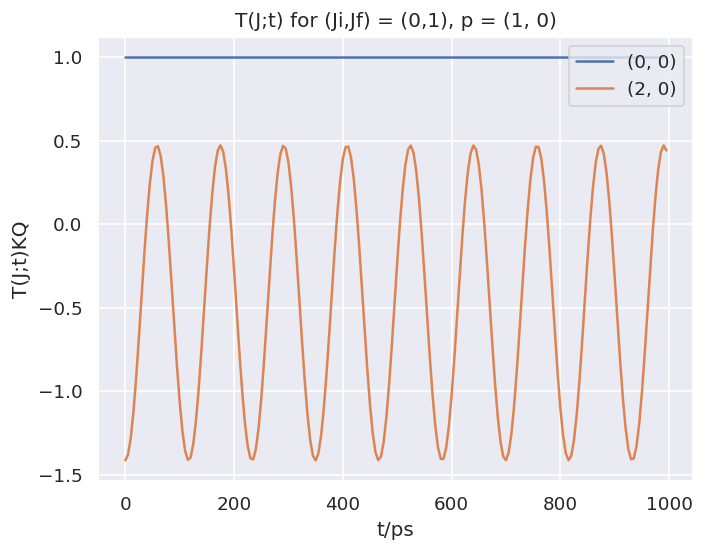

In [77]:
# Calculate 1-photon abs. and hyperfine wavepacket evolution

# Set t-axis, in ps
tIn = np.arange(0,1000,5)*1e-12

# Define intial & photon states
Ji = 0  # Initial |J>
p = (1,0)   # Coupling (photon) |1,q>

# Set final state parameters by isotope
JFlist = JF129
Jf = int(JFlist[0][0]) # Final state J

# Calculate T(J)KQ following 1-photon abs.
TKQ = TKQpmm(Jf,Jf, Ji = Ji, p = p)
print(TKQ)

# Calculate T(J;t)KQ
TJt = TJtKQ(JFlist,TKQ,tIn)

# Plot with legend, label by (K,Q) values
norm = TJt[0,0]  # Optional normalisation by T(0,0) (population) term
plt.figure(dpi=120)
for n in range(0,TJt.shape[0],1):
    plt.plot(tIn/1e-12,TJt[n][:]/norm, label=str((int(TKQ[n][0]), int(TKQ[n][1]))))

plt.legend(loc='upper right')
plt.title('T(J;t) for (Ji,Jf) = ({0},{1}), p = {2}'.format(Ji,Jf,p))
plt.xlabel('t/ps')
plt.ylabel('T(J;t)KQ')
plt.grid(True)
plt.show()

In [78]:
# Try with setBLMs...
from epsproc.sphCalc import setBLMs

basicXR129 = setBLMs(TJt.astype(float), t=tIn/1e-12, LMLabels=TKQ[:,0:2].astype(int), dimNames=['TKQ', 't'])

# Modify...
basicXR129 = basicXR129.unstack('TKQ').rename({'l':'K','m':'Q'}).stack({'TKQ':('K','Q')})
basicXR129.attrs['dataType']='TKQ'
basicXR129.attrs['long_name']='Irreducible tensor parameters'
basicXR129.name = '129Xe'
basicXR129.attrs['abundance'] = 0.264006  # (82)
basicXR129

<xarray.DataArray '129Xe' (t: 200, TKQ: 2)>
array([[ 0.19245009, -0.27216553],
       [ 0.19245009, -0.26560916],
       [ 0.19245009, -0.24641389],
       [ 0.19245009, -0.21596694],
       [ 0.19245009, -0.17646866],
       [ 0.19245009, -0.13077356],
       [ 0.19245009, -0.08218397],
       [ 0.19245009, -0.0342114 ],
       [ 0.19245009,  0.00967723],
       [ 0.19245009,  0.04631012],
       [ 0.19245009,  0.07303988],
       [ 0.19245009,  0.08793476],
       [ 0.19245009,  0.08991834],
       [ 0.19245009,  0.07884726],
       [ 0.19245009,  0.05552161],
       [ 0.19245009,  0.02162711],
       [ 0.19245009, -0.02038671],
       [ 0.19245009, -0.06748358],
       [ 0.19245009, -0.11625984],
       [ 0.19245009, -0.16319051],
...
       [ 0.19245009, -0.06206211],
       [ 0.19245009, -0.11082557],
       [ 0.19245009, -0.15813615],
       [ 0.19245009, -0.20057478],
       [ 0.19245009, -0.23507446],
       [ 0.19245009, -0.25914194],
       [ 0.19245009, -0.2710379 ],
       [ 0.19245009, -0.26990262],
       [ 0.19245009, -0.25581815],
       [ 0.19245009, -0.22980236],
       [ 0.19245009, -0.19373538],
       [ 0.19245009, -0.15022373],
       [ 0.19245009, -0.10241195],
       [ 0.19245009, -0.05375533],
       [ 0.19245009, -0.00777025],
       [ 0.19245009,  0.03222002],
       [ 0.19245009,  0.06332543],
       [ 0.19245009,  0.08329801],
       [ 0.19245009,  0.09069438],
       [ 0.19245009,  0.08498   ]])
Coordinates:
  * t        (t) float64 0.0 5.0 10.0 15.0 20.0 ... 980.0 985.0 990.0 995.0
  * TKQ      (TKQ) MultiIndex
  - K        (TKQ) int64 0 2
  - Q        (TKQ) int64 0 0
Attributes:
    dataType:   TKQ
    long_name:  Irreducible tensor parameters
    units:      arb
    harmonics:  {'dtype': 'Complex harmonics', 'kind': 'complex', 'normType':...
    abundance:  0.264006

The dynamics show the expected, simple, quantum beat structure in
the $\langle T(J;t)_{KQ}^{\dagger}\rangle$. For 1-photon excitation,
with linearly polarised light, only $K=0,\,2,\,Q=0$ terms contribute.
The $(0,0)$ term reflects the total population, hence is temporally-invariant,
while the $(2,0)$ term shows the changing alignment as the wavepacket
evolves. 

The allowed terms, and phase of the quantum beats, depends on the transition - i.e. initial and final $J$ state, and photon angular momentum. For example, with circularly polarised light $M_p = +1$, terms with $K=1$ are also allowed, and are out-of-phase with $K=2$ terms.

### $^{131}Xe$ ###

[[ 0.          0.          0.19245009]
 [ 2.          0.         -0.27216553]]


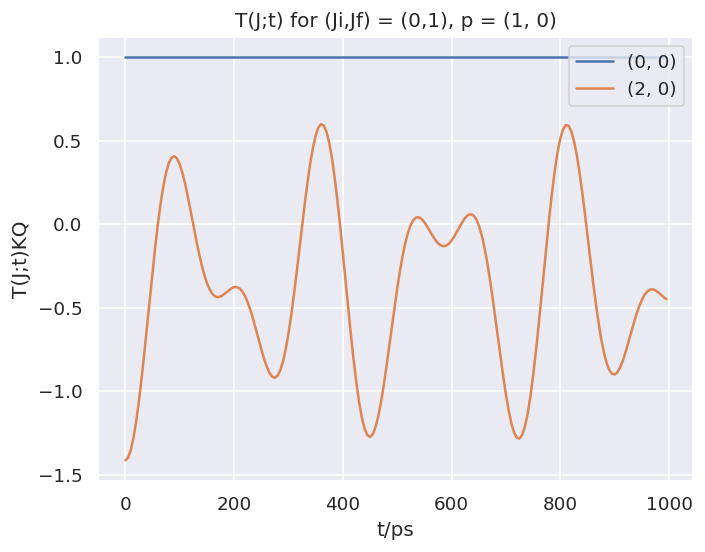

In [81]:
# Calculate 1-photon abs. and hyperfine wavepacket evolution

# Set final state parameters by isotope
JFlist = JF131
Jf = int(JFlist[0][0]) # Final state J

# Calculate T(J)KQ following 1-photon abs.
TKQ = TKQpmm(Jf,Jf, Ji = Ji, p = p)

print(TKQ)

# Calculate T(J;t)KQ
TJt = TJtKQ(JFlist,TKQ,tIn)

# Plot with legend, label by (K,Q) values
norm = TJt[0,0]  # Optional normalisation by T(0,0) (population) term
plt.figure(dpi=120)
for n in range(0,TJt.shape[0],1):
    plt.plot(tIn/1e-12,TJt[n][:]/norm, label=str((int(TKQ[n][0]), int(TKQ[n][1]))))

plt.legend(loc='upper right')
plt.title('T(J;t) for (Ji,Jf) = ({0},{1}), p = {2}'.format(Ji,Jf,p))
plt.xlabel('t/ps')
plt.ylabel('T(J;t)KQ')
plt.grid(True)
plt.show()

In [82]:
TKQ

array([[ 0.        ,  0.        ,  0.19245009],
       [ 2.        ,  0.        , -0.27216553]])

In [83]:
# Reformat to Xarray
import xarray as xr

# Basic
TJtXR = xr.DataArray(TJt.astype(float), coords={'TKQ':TKQ[:,0].astype(int), 't':tIn/1e-12})
TJtXR

<xarray.DataArray (TKQ: 2, t: 200)>
array([[ 0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
         0.19245009,  0.19245009,  0.19245009,  0.19245009,  0.19245009,
...
        -0.07419441, -0.05409765, -0.03635174, -0.02137894, -0.00944877,
        -0.00067277,  0.00499312,  0.0077388 ,  0.00788362,  0.00585399,
         0.00215637, -0.00265311, -0.00800083, -0.01332811, -0.01812223,
        -0.02194463, -0.02445478, -0.02542866, -0.02477095, -0.02252026,
        -0.01884725, -0.01404563, -0.00851652, -0.00274698,  0.00271641,
         0.00729742,  0.0104223 ,  0.01155227,  0.01021513,  0.00603414,
        -0.00124715, -0.0117454 , -0.02542438, -0.04208896, -0.06138665,
        -0.08281668, -0.10574645, -0.1294345 , -0.15305934, -0.17575264,
        -0.19663549, -0.21485614, -0.22962737, -0.24026207, -0.24620516,
        -0.24706048, -0.24261148, -0.23283452, -0.2179043 , -0.19819093,
        -0.17424884, -0.14679777, -0.11669676, -0.08491205, -0.05248033,
        -0.02046889,  0.01006574,  0.03811881,  0.06277624,  0.08324993,
         0.09890771,  0.10929695,  0.11416061,  0.11344521,  0.1073004 ,
         0.09607019,  0.08027627,  0.06059417,  0.03782342,  0.01285305,
        -0.01337616, -0.03991081, -0.06582384, -0.09025149, -0.11242679,
        -0.13170806, -0.14760127, -0.15977542, -0.1680702 , -0.17249598,
        -0.17322599, -0.17058134, -0.16500974, -0.15705876, -0.14734534,
        -0.13652267, -0.12524638, -0.11414131, -0.10377086, -0.09460989,
        -0.08702288, -0.08124802, -0.07738813, -0.07540872, -0.07514326,
        -0.07630531, -0.07850697, -0.08128258, -0.08411657, -0.08647406]])
Coordinates:
  * TKQ      (TKQ) int64 0 2
  * t        (t) float64 0.0 5.0 10.0 15.0 20.0 ... 980.0 985.0 990.0 995.0

In [84]:
# Try with setBLMs...
from epsproc.sphCalc import setBLMs

basicXR131 = setBLMs(TJt.astype(float), t=tIn/1e-12, LMLabels=TKQ[:,0:2].astype(int), dimNames=['TKQ', 't'])

# Modify...
basicXR131 = basicXR131.unstack('TKQ').rename({'l':'K','m':'Q'}).stack({'TKQ':('K','Q')})
basicXR131.attrs['dataType']='TKQ'
basicXR131.attrs['long_name']='Irreducible tensor parameters'
basicXR131.name = '131Xe'
basicXR131.attrs['abundance'] = 0.212324  # (30)
basicXR131

<xarray.DataArray '131Xe' (t: 200, TKQ: 2)>
array([[ 0.19245009, -0.27216553],
       [ 0.19245009, -0.2692452 ],
       [ 0.19245009, -0.26058824],
       [ 0.19245009, -0.24650244],
       [ 0.19245009, -0.22748682],
       [ 0.19245009, -0.20421135],
       [ 0.19245009, -0.17748974],
       [ 0.19245009, -0.14824661],
       [ 0.19245009, -0.11748036],
       [ 0.19245009, -0.08622336],
       [ 0.19245009, -0.05550129],
       [ 0.19245009, -0.02629316],
       [ 0.19245009,  0.00050605],
       [ 0.19245009,  0.02411868],
       [ 0.19245009,  0.04391226],
       [ 0.19245009,  0.0594207 ],
       [ 0.19245009,  0.07035804],
       [ 0.19245009,  0.07662425],
       [ 0.19245009,  0.07830299],
       [ 0.19245009,  0.07565144],
...
       [ 0.19245009, -0.17322599],
       [ 0.19245009, -0.17058134],
       [ 0.19245009, -0.16500974],
       [ 0.19245009, -0.15705876],
       [ 0.19245009, -0.14734534],
       [ 0.19245009, -0.13652267],
       [ 0.19245009, -0.12524638],
       [ 0.19245009, -0.11414131],
       [ 0.19245009, -0.10377086],
       [ 0.19245009, -0.09460989],
       [ 0.19245009, -0.08702288],
       [ 0.19245009, -0.08124802],
       [ 0.19245009, -0.07738813],
       [ 0.19245009, -0.07540872],
       [ 0.19245009, -0.07514326],
       [ 0.19245009, -0.07630531],
       [ 0.19245009, -0.07850697],
       [ 0.19245009, -0.08128258],
       [ 0.19245009, -0.08411657],
       [ 0.19245009, -0.08647406]])
Coordinates:
  * t        (t) float64 0.0 5.0 10.0 15.0 20.0 ... 980.0 985.0 990.0 995.0
  * TKQ      (TKQ) MultiIndex
  - K        (TKQ) int64 0 2
  - Q        (TKQ) int64 0 0
Attributes:
    dataType:   TKQ
    long_name:  Irreducible tensor parameters
    units:      arb
    harmonics:  {'dtype': 'Complex harmonics', 'kind': 'complex', 'normType':...
    abundance:  0.212324

## Read experimental data and plot vs. TKQ

In [5]:
# TO FIX: this should be identical, but gives slightly different plots - possibly complex/real/abs confusion?

from epsproc import IO
from pathlib import Path

dataPath = Path('/tmp/xe_analysis')
dataTypes = ['BLMall', 'BLMerr', 'BLMerrCycle']   # Read these types, should just do dir scan here.

# Read from HDF5/NetCDF files
dataDict = {}
for item in dataTypes:
    dataDict[item] = IO.readXarray(fileName=f'Xe_dataset_{item}.nc', filePath=dataPath.as_posix()).real
    dataDict[item].name = item

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 


* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.


* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
*** Read /tmp/xe_analysis/Xe_dataset_BLMall.nc.
*** Read /tmp/xe_analysis/Xe_dataset_BLMerr.nc.
*** Read /tmp/xe_analysis/Xe_dataset_BLMerrCycle.nc.


In [6]:
from qbanalysis.dataset import loadFinalDataset
dataDict = loadFinalDataset(dataPath)

2024-06-07 09:40:12.124 | INFO     | qbanalysis.dataset:loadDataset:167 - Loaded data cpBasex_results_cycleSummed_rot90_quad1_ROI_results_with_FT_NFFT1024_hanningWindow_270717.mat.
2024-06-07 09:40:12.170 | INFO     | qbanalysis.dataset:loadDataset:167 - Loaded data cpBasex_results_allCycles_ROIs_with_FTs_NFFT1024_hanningWindow_270717.mat.
2024-06-07 09:40:12.478 | INFO     | qbanalysis.dataset:loadFinalDataset:143 - Processed data to Xarray OK.


In [92]:
from qbanalysis.plots import plotFinalDatasetBLMt
hvData = plotFinalDatasetBLMt(**dataDict)
hvData

:NdLayout   [l]
   :Overlay
      .NdOverlay.I  :NdOverlay   [ROI]
         :Spread   [t]   (BLM per cycle,BLM per cycle_std)
      .NdOverlay.II :NdOverlay   [ROI]
         :Curve   [t]   (BLM input 0)

In [8]:
# TODO - setup XR/HV dataset to match calcs...
# tIn/1e-12,TJt[n][:]/norm
# , label=str((np.int(TKQ[n][0]), np.int(TKQ[n][1])))

In [51]:
# TJtXR.hvplot.line(x='t').overlay('TKQ')  # Basic case
basicXR.unstack().hvplot.line(x='t').overlay(['K','Q'])   # With set BLMs

:NdOverlay   [Q,K]
   :Curve   [t]   (131Xe)

In [102]:
# Overlay plots

# All dims
# hvData * (basicXR+basicXR129).unstack().hvplot.line(x='t').overlay(['K','Q'])

# With subselection
hvData * (0.5*(basicXR131+basicXR129)).sel({'K':2}).unstack().hvplot.line(x='t').overlay(['Q'])

:NdLayout   [l]
   :Overlay
      .NdOverlay.I   :NdOverlay   [ROI]
         :Spread   [t]   (BLM per cycle,BLM per cycle_std)
      .NdOverlay.II  :NdOverlay   [ROI]
         :Curve   [t]   (BLM input 0)
      .NdOverlay.III :NdOverlay   [Q]
         :Curve   [t]   (value)

In [109]:
# Include abundances...

renorm = basicXR131.attrs['abundance'] + basicXR129.attrs['abundance']
isoSum = (basicXR131*basicXR131.attrs['abundance']+basicXR129*basicXR129.attrs['abundance'])/renorm

# hvData * isoSum.sel({'K':2}).unstack().hvplot.line(x='t').overlay(['Q'])
modelPlot = isoSum.sel({'K':2}).unstack().hvplot.line(x='t', color='k', line_dash='dashed').overlay(['Q']) 

# (modelPlot * hvData).opts(width=1000)  # Can't set width here...?
(modelPlot.opts(width=1000) * hvData.opts(width=1000))  # Ah, this works

:NdLayout   [l]
   :Overlay
      .NdOverlay.I   :NdOverlay   [Q]
         :Curve   [t]   (value)
      .NdOverlay.II  :NdOverlay   [ROI]
         :Spread   [t]   (BLM per cycle,BLM per cycle_std)
      .NdOverlay.III :NdOverlay   [ROI]
         :Curve   [t]   (BLM input 0)

INTERESTING....

- L=4 case almost matches exactly... must be direct relation here (if only single partial wave...???). Do see a slight t-shift though, which might be a phase or just expt. shift... TBC...
- Should be sensitive to other stuff for L=2 case?
- Should be sensitive to natural abundances here.
- Safe to assume same matE for isotopes?

In [101]:
renorm